In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
wup = lambda lcs_depth, d1_root, d2_root: 2 * lcs_depth / (d1_root + d2_root)
lch = lambda sp_len, d: -np.log(sp_len / (2 * d))
path = lambda sp_len: 1 / sp_len

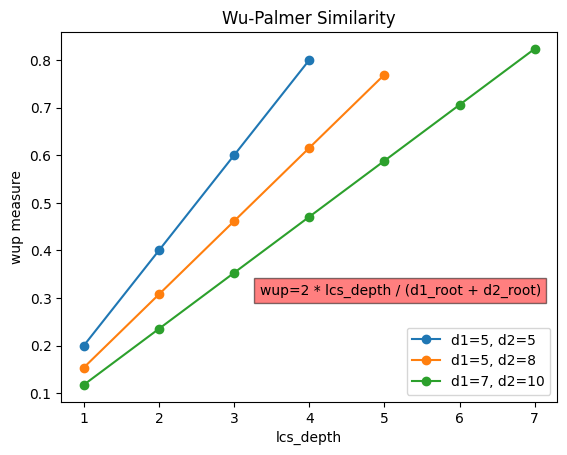

In [11]:
# In the wup similarity measure, a smaller lcs distance means that the two synsets are more similar,
# and this is divided by the sum of the distance of each synset to the root node.
# In this way, synsets in upper level of the hierarchy are penalized, because this sum will be lower and
# the measure itself, this perhaps is related to a less specialisation of the concepts.
# lower WUP value ==> higher similarity

wup_measures_1 = [wup(x, 5, 5) for x in [1, 2, 3, 4]]
wup_measures_2 = [wup(x, 5, 8) for x in [1, 2, 3, 4, 5]]
wup_measures_3 = [wup(x, 7, 10) for x in [1, 2, 3, 4, 5, 6, 7]]

fig, ax = plt.subplots()
ax.text(0.4, 0.3, 'wup=2 * lcs_depth / (d1_root + d2_root)',
        horizontalalignment='left', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax.plot([1, 2, 3, 4], wup_measures_1, marker='o', label='d1=5, d2=5')
ax.plot([1, 2, 3, 4, 5], wup_measures_2, marker='o', label='d1=5, d2=8')
ax.plot([1, 2, 3, 4, 5, 6, 7], wup_measures_3, marker='o', label='d1=7, d2=10')
plt.legend(loc='lower right')

ax.set(xlabel='lcs_depth', ylabel='wup measure', title='Wu-Palmer Similarity')

plt.show()

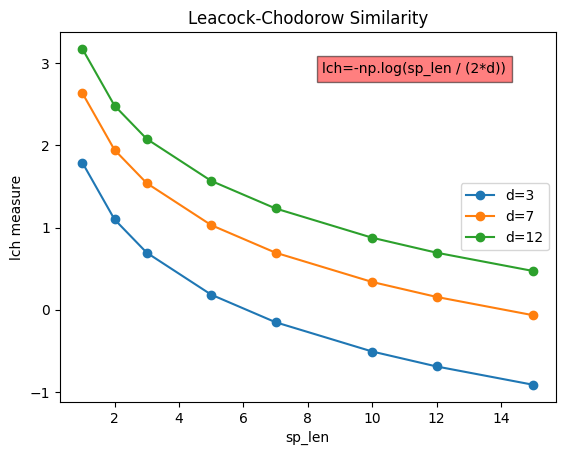

In [8]:
# In Leacock-Chodorow similarity, high value means high similarity. 
# With a lower shortest path length and a longer maximum taxonomy length, the result is higher.

d = [3, 7, 12]
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]

lch_1 = [lch(x, d[0]) for x in sp_len]
lch_2 = [lch(x, d[1]) for x in sp_len]
lch_3 = [lch(x, d[2]) for x in sp_len]

fig, ax = plt.subplots()
ax.text(0.9, 0.9, 'lch=-np.log(sp_len / (2*d))',
        horizontalalignment='right', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax.plot(sp_len, lch_1, marker='o', label='d=3') 
ax.plot(sp_len, lch_2, marker='o', label='d=7') 
ax.plot(sp_len, lch_3, marker='o', label='d=12')
plt.legend(loc='center right')
ax.set(xlabel='sp_len', ylabel='lch measure', title='Leacock-Chodorow Similarity')

plt.savefig('lch_graphic.png', format='png')
plt.show()

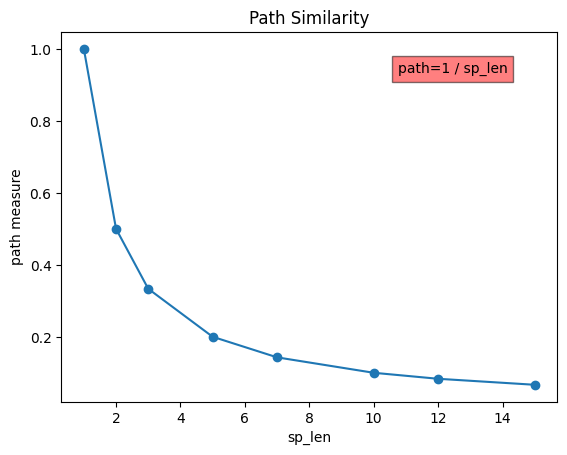

In [5]:
# In the Path similarity, a longer path between two synsets gives a smaller result, 
# so higher higher values means higher similairity.
 
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]
path_measure = [path(x) for x in sp_len]

fig, ax = plt.subplots()
ax.text(0.9, 0.9, 'path=1 / sp_len',
        horizontalalignment='right', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

ax.plot(sp_len,path_measure, marker='o')
ax.set(xlabel='sp_len', ylabel='path measure', title='Path Similarity')
#plt.savefig('path_graphic.png', format='png')
plt.show()

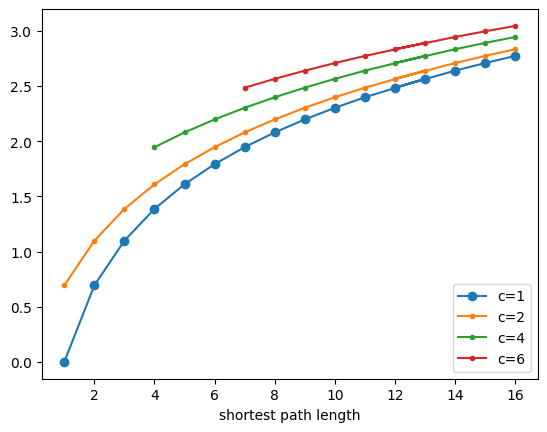

In [6]:
import numpy as np
com_path = lambda l, c:  -np.log(1 / (l + c))

sp_len = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 16]

com_path_measure0 = [com_path(x, 1) for x in sp_len]
com_path_measure1 = [com_path(x, 2) for x in sp_len]
com_path_measure2 = [com_path(x, 4) for x in sp_len[3:]]
com_path_measure3 = [com_path(x, 6) for x in sp_len[6:]]
com_path_measure4 = [com_path(x, 9) for x in sp_len[9:]]

fig, ax = plt.subplots()
#ax.text(0.9, 0.9, 'com_path=1 / (l + c)',
#        horizontalalignment='right', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

ax.plot(sp_len, com_path_measure0, marker='o'    , label='c=1')
ax.plot(sp_len, com_path_measure1, marker='.'    , label='c=2')
ax.plot(sp_len[3:], com_path_measure2, marker='.', label='c=4')
ax.plot(sp_len[6:], com_path_measure3, marker='.', label='c=6')
plt.legend(loc='lower right')
ax.set(xlabel='shortest path length')
plt.savefig('../../img/community_path_graphic.png', format='png')
plt.show()

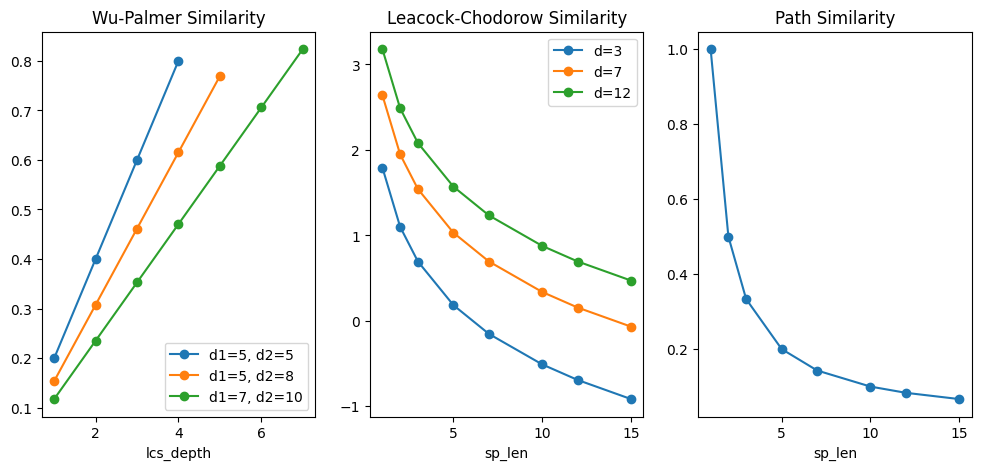

In [26]:
fig, ax = plt.subplots(1, 3)
### WUP
wup_measures_1 = [wup(x, 5, 5) for x in [1, 2, 3, 4]]
wup_measures_2 = [wup(x, 5, 8) for x in [1, 2, 3, 4, 5]]
wup_measures_3 = [wup(x, 7, 10) for x in [1, 2, 3, 4, 5, 6, 7]]

#ax[0].text(0.4, 0.3, 'wup=2 * lcs_depth / (d1_root + d2_root)',
#        horizontalalignment='left', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax[0].plot([1, 2, 3, 4], wup_measures_1, marker='o', label='d1=5, d2=5')
ax[0].plot([1, 2, 3, 4, 5], wup_measures_2, marker='o', label='d1=5, d2=8')
ax[0].plot([1, 2, 3, 4, 5, 6, 7], wup_measures_3, marker='o', label='d1=7, d2=10')
ax[0].legend(loc='lower right')
ax[0].set(xlabel='lcs_depth', title='Wu-Palmer Similarity')

### LCH
d = [3, 7, 12]
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]

lch_1 = [lch(x, d[0]) for x in sp_len]
lch_2 = [lch(x, d[1]) for x in sp_len]
lch_3 = [lch(x, d[2]) for x in sp_len]

#ax[1].text(0.9, 0.9, 'lch=-np.log(sp_len / (2*d))',
#        horizontalalignment='right', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax[1].plot(sp_len, lch_1, marker='o', label='d=3') 
ax[1].plot(sp_len, lch_2, marker='o', label='d=7') 
ax[1].plot(sp_len, lch_3, marker='o', label='d=12')
ax[1].legend(loc='upper right')
ax[1].set(xlabel='sp_len', title='Leacock-Chodorow Similarity')

### PATH
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]
path_measure = [path(x) for x in sp_len]

#ax[2].text(0.9, 0.9, 'path=1 / sp_len',
#        horizontalalignment='right', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

ax[2].plot(sp_len,path_measure, marker='o')
ax[2].set(xlabel='sp_len', title='Path Similarity')

fig.set_size_inches(12, 5)
plt.savefig('../../img/graphics.png', format='png')
plt.show()